In [108]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize,fmin_tnc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
fig_size = (14,6)

![Alt text](static/img/logic_reg.png )

In [109]:
def hypothesis_fn(θ, X):
    """
         θ - [[θ0], [θ1], ..., [θn]] parameters vector
         x - feature matrix (x0 - should be 1 due to: hθ(x) = θ0 + θ1X1 + θ2X2 + ... + θnXn)
    """
    z = X @ θ
    return  1 / (1 + np.exp(-z))

![Alt text](static/img/logic_reg_const_func.png )

In [3]:
def cost_fn(θ, X, y):
    """
        We can measure the accuracy of our hypothesis function by using a cost function. 
         X - features matrics (xi0 - should be 1 due to: hθ(x) = θ0 + θ1X1 + θ2X2 + ... + θnXn)
         y - lables
         θ - parameters
         m - the number of training examples
        returns:
            accuracy of hypothesis fn
    """
    m = X.shape[0]
    h = hypothesis_fn(θ, X) 
    y_equel_1 = np.transpose(-y) @ np.log(h)
    y_equel_0 = np.transpose((1 - y)) @ np.log(1 - h)
    return  (1 / m) * (y_equel_1 - y_equel_0)

![Alt text](static/img/logic_reg_gradient_descent.png )

In [4]:
def gradient_descent(θ, α, X, y, m):
    """
         θ - [θ0, θ1, ..., θn] parameters
         α - learing rate
         X - features matrics (xi0 - should be 1 due to: hθ(x) = θ0 + θ1X1 + θ2X2 + ... + θnXn)
         y - lables
         m - the number of training examples
    """
    g = hypothesis_fn(θ, X) 
    return θ - (α / m) * (np.transpose(X) @ (g - y))

In [8]:
def gradient(θ, X, y):
    m = X.shape[0]
    g = hypothesis_fn(θ, X)
    return ( 1 / m ) * np.transpose(X) @ (g - y)

In [6]:
def fit(X, y, θ):
    opt_weights = fmin_tnc(func=cost_fn, x0=θ, fprime=gradient, args=(X, y.flatten()))
    return opt_weights[0]

In [7]:
def predict(θ, X):
    h = hypothesis_fn(θ, X)
    y_predicted  = []
    for i in h:
        if i >= .5:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
    return y_predicted

In [9]:
def get_accuracy(y_predicted, y_actual):
    accuracy = 0
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == y_actual[i]:
            accuracy += 1
    output = accuracy/len(y_actual)
    return output

## Titanic Survival Dataset

In [110]:
# 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'
train_df  = pd.read_csv('static/datasets/titanic/train.csv')
# 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'
test_df = pd.read_csv('static/datasets/titanic/eval.csv')

In [11]:
train_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [111]:
train_df.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

<AxesSubplot:xlabel='class'>

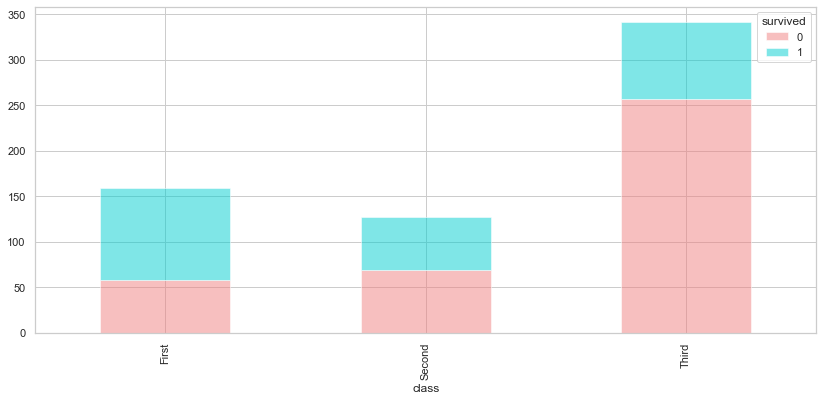

In [35]:
survived_by_class = train_df.groupby(['class', 'survived'], as_index=False).size()
survived_by_class = survived_by_class.pivot(index='class', columns='survived')['size']
survived_by_class.plot.bar(stacked=True, color = ["lightcoral", "darkturquoise"], alpha=.5, figsize = fig_size)

<AxesSubplot:xlabel='sex'>

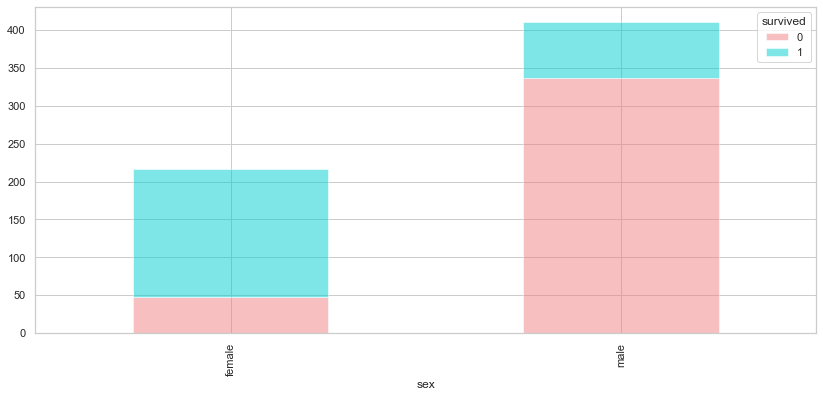

In [34]:
survived_by_class = train_df.groupby(['sex', 'survived'], as_index=False).size()
survived_by_class = survived_by_class.pivot(index='sex', columns='survived')['size']
survived_by_class.plot.bar(stacked=True, color = ["lightcoral", "darkturquoise"], alpha=.5, figsize=fig_size)

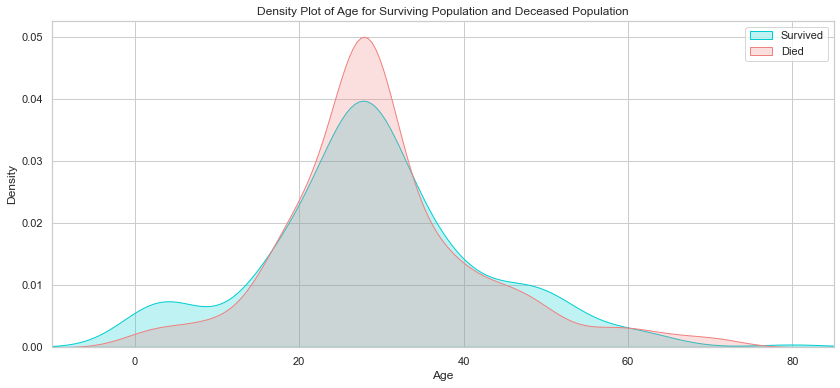

In [15]:
plt.figure(figsize=fig_size)
ax = sns.kdeplot(train_df['age'][train_df['survived'] == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df['age'][train_df['survived'] == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

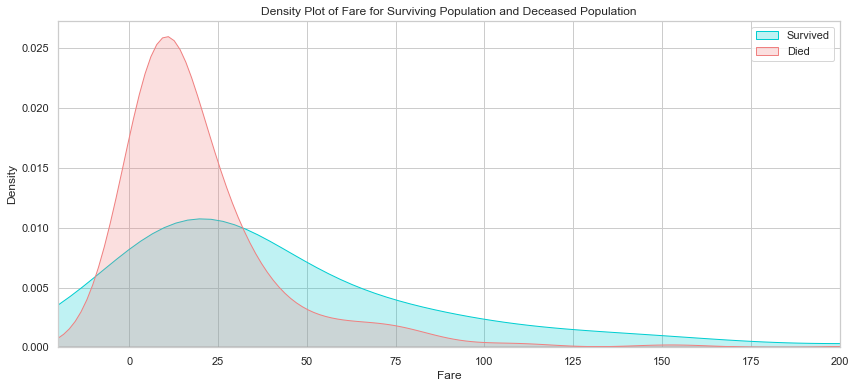

In [16]:
plt.figure(figsize=fig_size)
ax = sns.kdeplot(train_df["fare"][train_df['survived'] == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["fare"][train_df['survived'] == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

<AxesSubplot:xlabel='alone'>

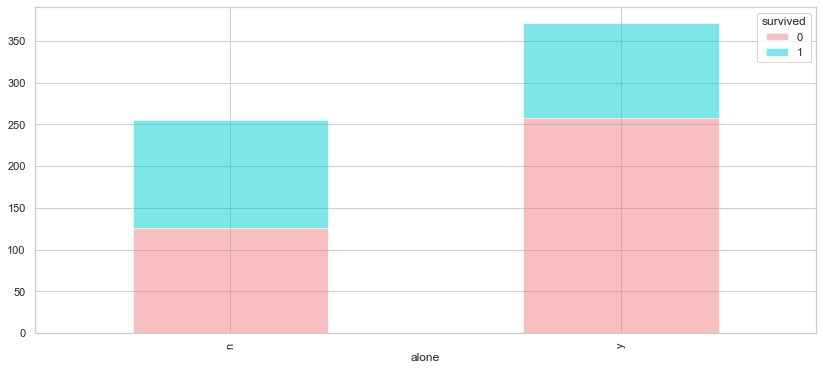

In [36]:
survived_by_class = train_df.groupby(['alone', 'survived'], as_index=False).size()
survived_by_class = survived_by_class.pivot(index='alone', columns='survived')['size']
survived_by_class.plot.bar(stacked=True, color = ["lightcoral", "darkturquoise"], alpha=.5, figsize=fig_size)

### Data Preparation

In [112]:
train_X  = train_df
train_y  = train_df.pop('survived')

test_X = test_df
test_y  = test_df.pop('survived')

In [113]:
feature_map = {}

for col in train_X:
    if(train_X[col].dtype == 'object'):
        categories = train_X[col].unique()
        categories_dict = {categories[i]: i + 1 for i in range(len(categories))}
        train_X[col] = train_X[col].replace(categories_dict)
        feature_map[col] = categories_dict

In [168]:
X = train_X.to_numpy()
y = train_y.to_numpy()
y = y.reshape((y.shape[0], 1))
m = X.shape[0]
X = np.concatenate((np.ones((m, 1)), X), axis=1) 
n = X.shape[1]
θ = np.zeros((n, 1))

In [115]:
for col in test_X:
    if(test_X[col].dtype == 'object'):
        test_X[col] = test_X[col].replace(feature_map[col])
    
X_test = test_X.to_numpy()
y_test = test_y.to_numpy()
y_test = y_test.reshape((y_test.shape[0], 1))

m = X_test.shape[0]
X_test = np.concatenate((np.ones((m, 1)), X_test), axis=1) 

### Training

In [171]:
# advanced optimization
parameters = fit(X, y, θ)

In [172]:
y_predicted = predict(parameters, X)
print(f"Accuracy on training data: {get_accuracy(y_predicted, y)}")

Accuracy on training data: 0.8197767145135566


In [24]:
y_predicted = predict(parameters, X_test) 
print(f"Accuracy on testing data: {get_accuracy(y_predicted, y_test)}")

Accuracy on testing data: 0.7727272727272727


In [25]:
# gradient descent optimization
α = 300
θ = np.ones((n, 1))
X_normalized = X / X.max()
cost_arr = np.empty([0, 2])

In [26]:
for i in range(0, 30000):
    θ = gradient_descent(θ, α, X_normalized, y, m)
    cost = cost_fn(θ, X_normalized, y)
    cost_arr = np.append(cost_arr, np.array([[i, cost[0][0]]]), axis=0)
print(cost)

[[0.43779541]]


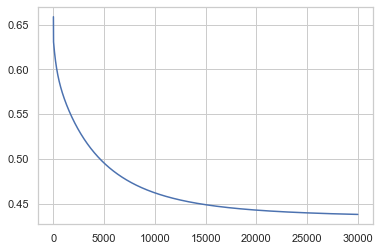

In [27]:
plt.plot(cost_arr[:, 0],cost_arr[:, 1])

In [28]:
y_predicted = predict(θ, X_normalized)
print(f"Accuracy on training data: {get_accuracy(y_predicted, y)}")

Accuracy on training data: 0.8229665071770335


In [29]:
X_test_normilized = X_test / X_test.max()
y_predicted = predict(θ, X_test_normilized) 
print(f"Accuracy on testing data: {get_accuracy(y_predicted, y_test)}")

Accuracy on testing data: 0.7803030303030303


In [90]:
# importances = pd.DataFrame([[, ] ])
importances = pd.DataFrame([{'feature':train_X.columns[i], 'importance':abs(θ[i + 1][0])} for i in range(len(train_X.columns) - 1)]).set_index('feature')

<AxesSubplot:xlabel='feature'>

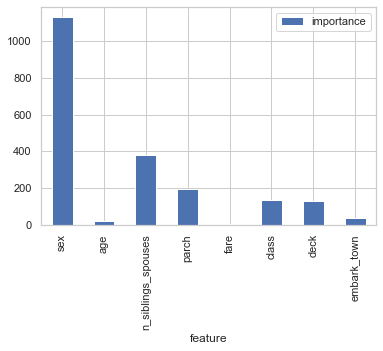

In [92]:
importances.plot.bar()